In [3]:
import sys
# Add utils to path
sys.path.append('../scripts')
from utils import *

In [4]:
contig_predictions = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/model/results/snakemake/predictions/contig_predictions.csv')
ground_truth = pd.read_excel('/home/tobamo/analize/project-tobamo/analysis/data/domain_sci_input/ground_truth_final_added_categories.xlsx')

In [14]:
merged = contig_predictions.merge(ground_truth, on='contig_name', how='inner')
merged

,contig_name,predicted_class,prob_1,ground_truth,category_old,category
0,NODE_10065_length_907_cov_3.860241_SRR1785207,1,0.995762,1,2,tob2
1,NODE_10075_length_1985_cov_2.739896_SRR10030315,1,0.991754,1,1,tob1
2,NODE_10125_length_831_cov_1.694602_SRR4242136,0,0.112469,0,7,mas
3,NODE_10151_length_1078_cov_2.825175_SRR1782604,0,0.013112,0,3,oth1
4,NODE_10162_length_1101_cov_1.094727_SRR8554352,1,0.997797,1,1,tob1
...,...,...,...,...,...,...
505,k141_71034_flag_1_multi_2.0000_len_752_SRR7288019,0,0.035488,0,5,oth2
506,k141_81265_flag_1_multi_5.0000_len_963_SRR7288019,0,0.121195,0,5,oth2
507,k141_83781_flag_1_multi_3.0000_len_1189_SRR728...,1,0.998128,1,1,tob1
508,k141_83_flag_1_multi_17.0000_len_6273_SRR7288019,1,1.000000,1,1,tob1


In [16]:
# Examine the structure of the merged data
print("Merged data shape:", merged.shape)
print("\nColumns in merged data:")
print(merged.columns.tolist())
print("\nFirst few rows:")
print(merged.head())

Merged data shape: (510, 6)

Columns in merged data:
['contig_name', 'predicted_class', 'prob_1', 'ground_truth', 'category_old', 'category']

First few rows:
                                       contig_name  predicted_class    prob_1  \
0    NODE_10065_length_907_cov_3.860241_SRR1785207                1  0.995762   
1  NODE_10075_length_1985_cov_2.739896_SRR10030315                1  0.991754   
2    NODE_10125_length_831_cov_1.694602_SRR4242136                0  0.112469   
3   NODE_10151_length_1078_cov_2.825175_SRR1782604                0  0.013112   
4   NODE_10162_length_1101_cov_1.094727_SRR8554352                1  0.997797   

   ground_truth  category_old category  
0             1             2     tob2  
1             1             1     tob1  
2             0             7      mas  
3             0             3     oth1  
4             1             1     tob1  


In [17]:
# Import additional libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [24]:
# Ranked K Statistics Analysis - False Positive Positioning

# Sort predictions by probability (descending order for positive class)
merged_sorted = merged.sort_values('prob_1', ascending=False).reset_index(drop=True)

# Add rank column
merged_sorted['rank'] = merged_sorted.index + 1

# Calculate prediction results
merged_sorted['is_true_positive'] = (merged_sorted['predicted_class'] == 1) & (merged_sorted['ground_truth'] == 1)
merged_sorted['is_false_positive'] = (merged_sorted['predicted_class'] == 1) & (merged_sorted['ground_truth'] == 0)
merged_sorted['is_true_negative'] = (merged_sorted['predicted_class'] == 0) & (merged_sorted['ground_truth'] == 0)
merged_sorted['is_false_negative'] = (merged_sorted['predicted_class'] == 0) & (merged_sorted['ground_truth'] == 1)

print("Distribution of prediction results:")
print(f"True Positives: {merged_sorted['is_true_positive'].sum()}")
print(f"False Positives: {merged_sorted['is_false_positive'].sum()}")
print(f"True Negatives: {merged_sorted['is_true_negative'].sum()}")
print(f"False Negatives: {merged_sorted['is_false_negative'].sum()}")

# Display first few rows with rankings
print("\nFirst 10 predictions (ranked by probability):")
display_cols = ['contig_name', 'prob_1', 'rank', 'predicted_class', 'ground_truth', 'is_true_positive', 'is_false_positive']
merged_sorted

Distribution of prediction results:
True Positives: 212
False Positives: 73
True Negatives: 209
False Negatives: 16

First 10 predictions (ranked by probability):


,contig_name,predicted_class,prob_1,ground_truth,category_old,category,rank,is_true_positive,is_false_positive,is_true_negative,is_false_negative
0,k141_83_flag_1_multi_17.0000_len_6273_SRR7288019,1,1.000000e+00,1,1,tob1,1,True,False,False,False
1,NODE_535_length_5799_cov_52.077574_SRR4242136,1,1.000000e+00,1,1,tob1,2,True,False,False,False
2,NODE_256_length_6307_cov_19.638684_SRR8554352,1,1.000000e+00,1,1,tob1,3,True,False,False,False
3,NODE_1325_length_4942_cov_5.310006_ERR3010915,1,1.000000e+00,1,2,tob2,4,True,False,False,False
4,NODE_916_length_3714_cov_7.049740_ERR1356733,1,1.000000e+00,1,1,tob1,5,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
505,NODE_388_length_7112_cov_160.791129_SRR5087382,0,2.125457e-10,0,5,oth2,506,False,False,True,False
506,NODE_820_length_7832_cov_28.015990_SRR10143187,0,2.125457e-10,0,5,oth2,507,False,False,True,False
507,NODE_46_length_7255_cov_4.852187_SRR6660821,0,1.099480e-10,0,3,oth1,508,False,False,True,False
508,NODE_10_length_7298_cov_9.011435_SRR9317871,0,3.741095e-11,0,5,oth2,509,False,False,True,False


In [25]:
# Ranked K Statistics - Cumulative Analysis
def calculate_rank_k_stats(df, k_values=None):
    """Calculate rank@k statistics for false positive positioning"""
    
    if k_values is None:
        # Default k values - percentiles of dataset size
        total_predictions = len(df)
        k_values = [10, 25, 50, 100, 250, total_predictions//4, total_predictions//2, total_predictions]
    
    stats = []
    
    # Get only positive predictions for ranking analysis
    positive_preds = df[df['predicted_class'] == 1].copy()
    
    for k in k_values:
        if k > len(positive_preds):
            k = len(positive_preds)
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate metrics
        total_fp_in_topk = top_k['is_false_positive'].sum()
        total_tp_in_topk = top_k['is_true_positive'].sum()
        total_fp_overall = df['is_false_positive'].sum()
        total_tp_overall = df['is_true_positive'].sum()
        
        precision_at_k = total_tp_in_topk / k if k > 0 else 0
        recall_at_k = total_tp_in_topk / total_tp_overall if total_tp_overall > 0 else 0
        fp_rate_at_k = total_fp_in_topk / k if k > 0 else 0
        fp_coverage_at_k = total_fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        stats.append({
            'k': k,
            'total_predictions_in_topk': k,
            'true_positives_in_topk': total_tp_in_topk,
            'false_positives_in_topk': total_fp_in_topk,
            'precision_at_k': precision_at_k,
            'recall_at_k': recall_at_k,
            'false_positive_rate_at_k': fp_rate_at_k,
            'false_positive_coverage_at_k': fp_coverage_at_k,
            'cumulative_prob_threshold': top_k['prob_1'].iloc[-1] if len(top_k) > 0 else 0
        })
    
    return pd.DataFrame(stats)

# Calculate rank@k statistics
rank_k_stats = calculate_rank_k_stats(merged_sorted)
print("Rank@K Statistics - False Positive Positioning Analysis:")
print("="*80)
rank_k_stats

Rank@K Statistics - False Positive Positioning Analysis:


,k,total_predictions_in_topk,true_positives_in_topk,false_positives_in_topk,precision_at_k,recall_at_k,false_positive_rate_at_k,false_positive_coverage_at_k,cumulative_prob_threshold
0,10,10,9,1,0.900000,0.042453,0.100000,0.013699,1.000000
1,25,25,20,5,0.800000,0.094340,0.200000,0.068493,0.999992
2,50,50,38,12,0.760000,0.179245,0.240000,0.164384,0.999926
3,100,100,79,21,0.790000,0.372642,0.210000,0.287671,0.998310
4,250,250,198,52,0.792000,0.933962,0.208000,0.712329,0.877367
5,127,127,105,22,0.826772,0.495283,0.173228,0.301370,0.998150
6,255,255,201,54,0.788235,0.948113,0.211765,0.739726,0.861686
7,285,285,212,73,0.743860,1.000000,0.256140,1.000000,0.514738


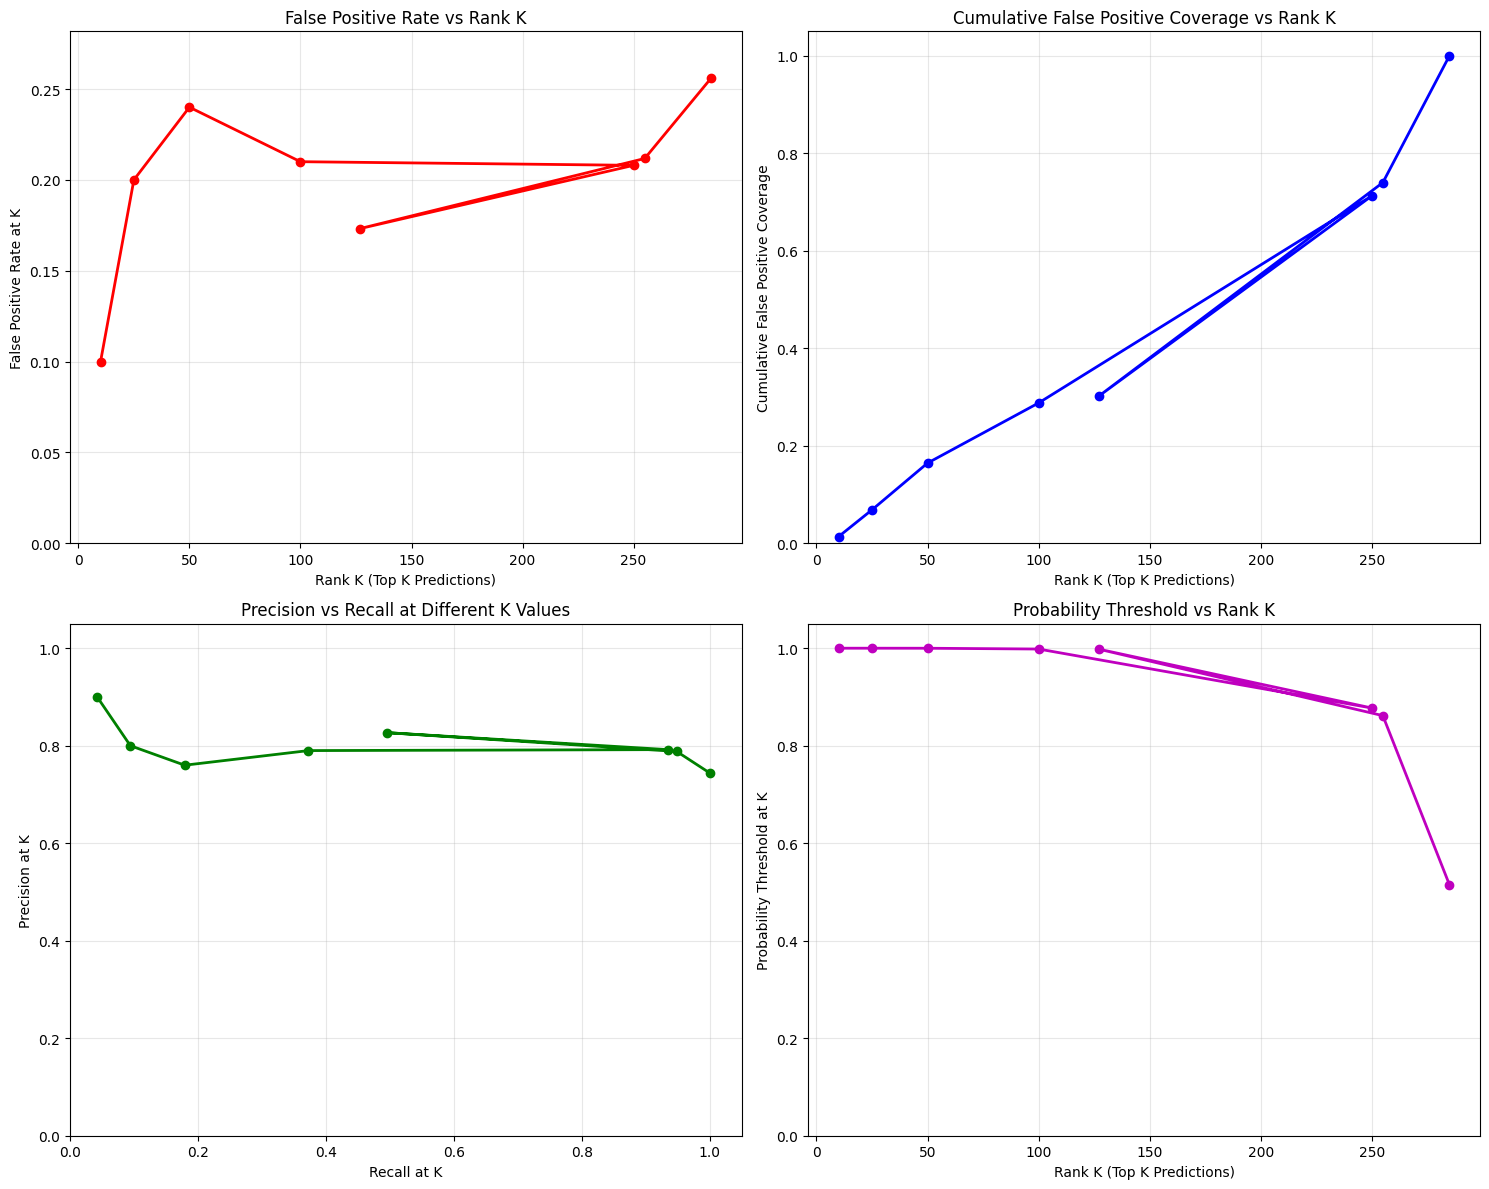

In [20]:
# Visualizations for False Positive Positioning

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. False Positive Rate at different ranks
axes[0, 0].plot(rank_k_stats['k'], rank_k_stats['false_positive_rate_at_k'], 'ro-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Rank K (Top K Predictions)')
axes[0, 0].set_ylabel('False Positive Rate at K')
axes[0, 0].set_title('False Positive Rate vs Rank K')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, max(rank_k_stats['false_positive_rate_at_k']) * 1.1)

# 2. Cumulative False Positive Coverage
axes[0, 1].plot(rank_k_stats['k'], rank_k_stats['false_positive_coverage_at_k'], 'bo-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Rank K (Top K Predictions)')
axes[0, 1].set_ylabel('Cumulative False Positive Coverage')
axes[0, 1].set_title('Cumulative False Positive Coverage vs Rank K')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1.05)

# 3. Precision vs Recall curve
axes[1, 0].plot(rank_k_stats['recall_at_k'], rank_k_stats['precision_at_k'], 'go-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Recall at K')
axes[1, 0].set_ylabel('Precision at K')
axes[1, 0].set_title('Precision vs Recall at Different K Values')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, 1.05)
axes[1, 0].set_ylim(0, 1.05)

# 4. Probability thresholds
axes[1, 1].plot(rank_k_stats['k'], rank_k_stats['cumulative_prob_threshold'], 'mo-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Rank K (Top K Predictions)')
axes[1, 1].set_ylabel('Probability Threshold at K')
axes[1, 1].set_title('Probability Threshold vs Rank K')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [21]:
# Detailed False Positive Position Analysis

# Get positions of all false positives
fp_positions = merged_sorted[merged_sorted['is_false_positive'] == True]['rank'].values
total_positives = (merged_sorted['predicted_class'] == 1).sum()

print("DETAILED FALSE POSITIVE POSITIONING ANALYSIS")
print("=" * 60)
print(f"Total false positives: {len(fp_positions)}")
print(f"Total positive predictions: {total_positives}")
print(f"False positive rate overall: {len(fp_positions)/total_positives:.4f}")
print()

# Analyze false positive distribution by quartiles
quartiles = [total_positives//4, total_positives//2, 3*total_positives//4, total_positives]
quartile_names = ['Q1 (Top 25%)', 'Q2 (Top 50%)', 'Q3 (Top 75%)', 'Q4 (All)']

print("FALSE POSITIVE DISTRIBUTION BY QUARTILES:")
print("-" * 50)
prev_quartile = 0
for i, (quartile, name) in enumerate(zip(quartiles, quartile_names)):
    fp_in_quartile = len([pos for pos in fp_positions if prev_quartile < pos <= quartile])
    fp_pct_of_quartile = fp_in_quartile / (quartile - prev_quartile) if quartile > prev_quartile else 0
    fp_pct_of_total_fp = fp_in_quartile / len(fp_positions) if len(fp_positions) > 0 else 0
    
    print(f"{name:15} | FP count: {fp_in_quartile:2d} | FP rate: {fp_pct_of_quartile:.4f} | % of total FP: {fp_pct_of_total_fp:.4f}")
    prev_quartile = quartile

print()

# Specific positions analysis
print("SPECIFIC FALSE POSITIVE POSITIONS:")
print("-" * 40)
early_fp = [pos for pos in fp_positions if pos <= 50]
middle_fp = [pos for pos in fp_positions if 50 < pos <= 200]
late_fp = [pos for pos in fp_positions if pos > 200]

print(f"Early positions (rank ≤ 50): {len(early_fp)} FPs")
if early_fp:
    print(f"  Positions: {sorted(early_fp)}")
    print(f"  Mean rank: {np.mean(early_fp):.1f}")

print(f"Middle positions (50 < rank ≤ 200): {len(middle_fp)} FPs") 
if middle_fp:
    print(f"  Mean rank: {np.mean(middle_fp):.1f}")
    print(f"  Range: {min(middle_fp)} - {max(middle_fp)}")

print(f"Late positions (rank > 200): {len(late_fp)} FPs")
if late_fp:
    print(f"  Mean rank: {np.mean(late_fp):.1f}")
    print(f"  Range: {min(late_fp)} - {max(late_fp)}")

# Statistical summary
print(f"\nFALSE POSITIVE POSITION STATISTICS:")
print(f"Mean rank: {np.mean(fp_positions):.1f}")
print(f"Median rank: {np.median(fp_positions):.1f}")
print(f"Std deviation: {np.std(fp_positions):.1f}")
print(f"Min rank: {np.min(fp_positions)}")
print(f"Max rank: {np.max(fp_positions)}")

DETAILED FALSE POSITIVE POSITIONING ANALYSIS
Total false positives: 73
Total positive predictions: 285
False positive rate overall: 0.2561

FALSE POSITIVE DISTRIBUTION BY QUARTILES:
--------------------------------------------------
Q1 (Top 25%)    | FP count: 16 | FP rate: 0.2254 | % of total FP: 0.2192
Q2 (Top 50%)    | FP count:  6 | FP rate: 0.0845 | % of total FP: 0.0822
Q3 (Top 75%)    | FP count: 12 | FP rate: 0.1690 | % of total FP: 0.1644
Q4 (All)        | FP count: 39 | FP rate: 0.5417 | % of total FP: 0.5342

SPECIFIC FALSE POSITIVE POSITIONS:
----------------------------------------
Early positions (rank ≤ 50): 12 FPs
  Positions: [np.int64(7), np.int64(12), np.int64(13), np.int64(22), np.int64(24), np.int64(27), np.int64(28), np.int64(35), np.int64(38), np.int64(41), np.int64(46), np.int64(48)]
  Mean rank: 28.4
Middle positions (50 < rank ≤ 200): 15 FPs
  Mean rank: 107.7
  Range: 56 - 200
Late positions (rank > 200): 46 FPs
  Mean rank: 245.5
  Range: 205 - 285

FALSE PO

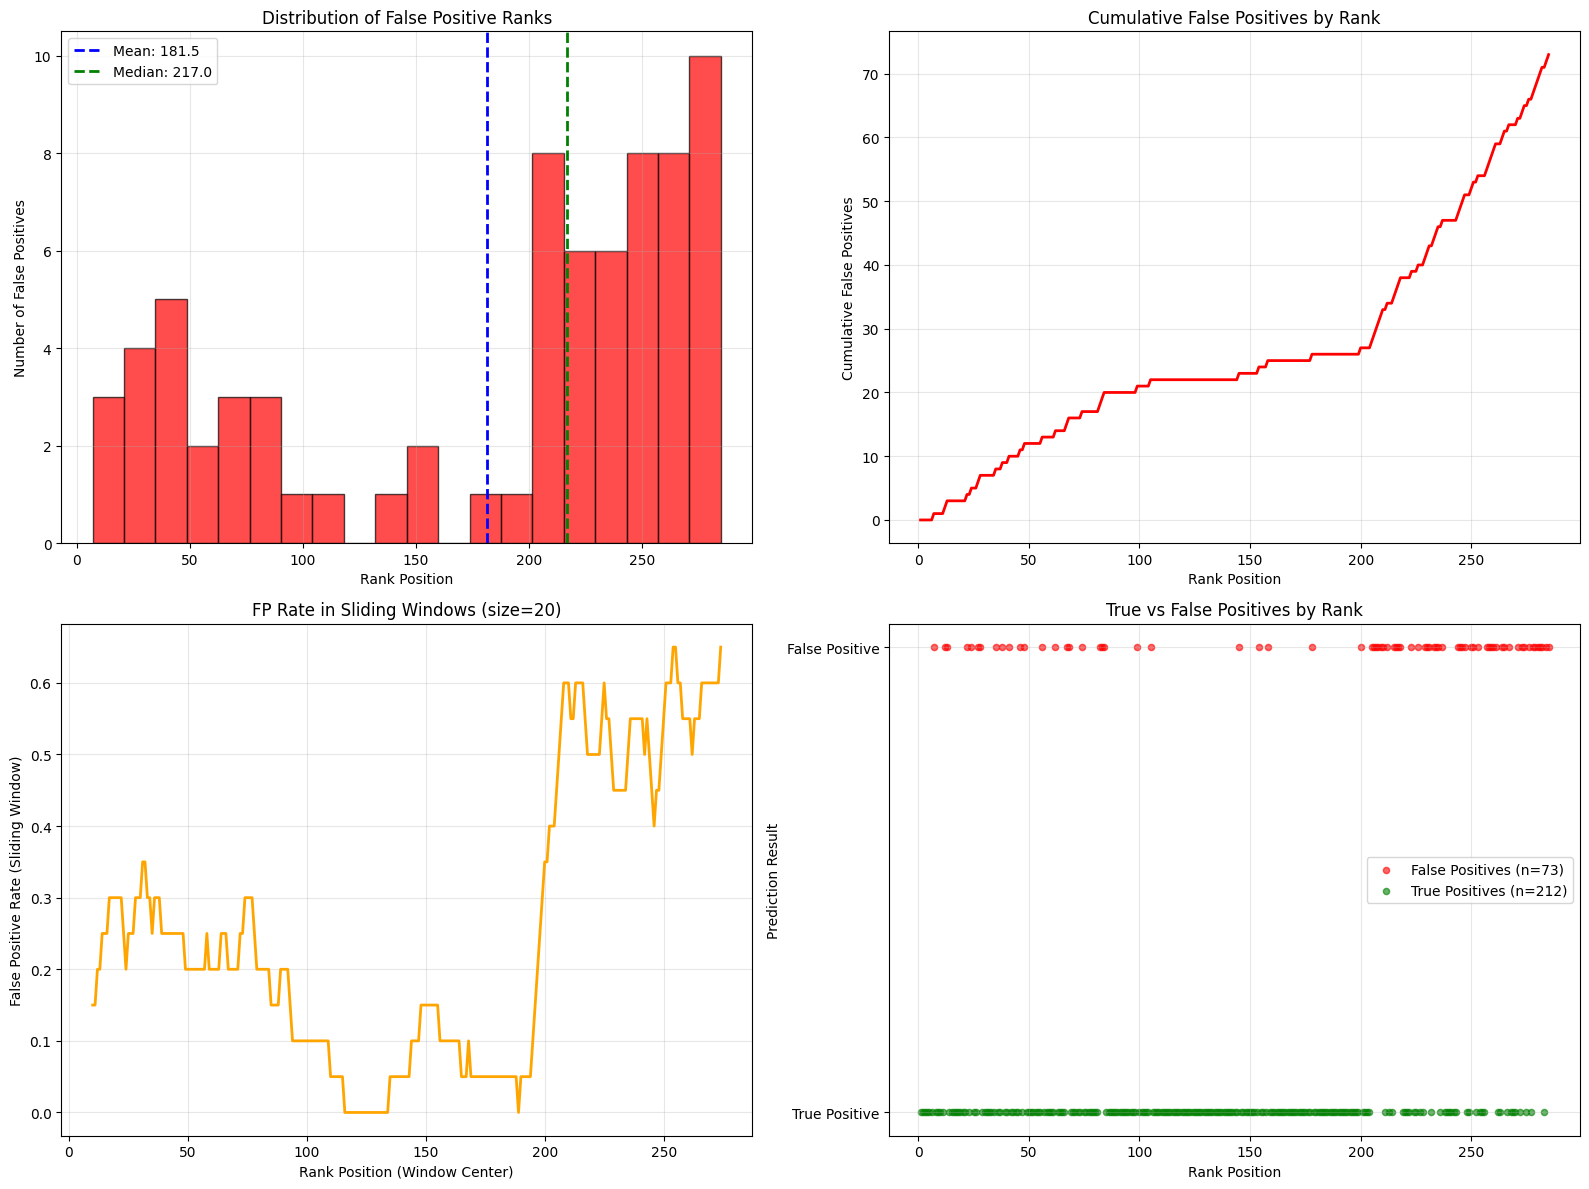

In [22]:
# Create a comprehensive visualization of false positive positions

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of false positive ranks
axes[0, 0].hist(fp_positions, bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0, 0].axvline(np.mean(fp_positions), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(fp_positions):.1f}')
axes[0, 0].axvline(np.median(fp_positions), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(fp_positions):.1f}')
axes[0, 0].set_xlabel('Rank Position')
axes[0, 0].set_ylabel('Number of False Positives')
axes[0, 0].set_title('Distribution of False Positive Ranks')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Cumulative false positive count vs rank
cumulative_fp = []
cumulative_count = 0
for rank in range(1, total_positives + 1):
    if rank in fp_positions:
        cumulative_count += 1
    cumulative_fp.append(cumulative_count)

axes[0, 1].plot(range(1, total_positives + 1), cumulative_fp, 'r-', linewidth=2)
axes[0, 1].set_xlabel('Rank Position')
axes[0, 1].set_ylabel('Cumulative False Positives')
axes[0, 1].set_title('Cumulative False Positives by Rank')
axes[0, 1].grid(True, alpha=0.3)

# 3. False positive rate in sliding windows
window_size = 20
fp_rates_windowed = []
window_centers = []

for i in range(window_size//2, total_positives - window_size//2):
    window_start = max(1, i - window_size//2)
    window_end = min(total_positives, i + window_size//2)
    
    fp_in_window = len([pos for pos in fp_positions if window_start <= pos <= window_end])
    fp_rate_window = fp_in_window / window_size
    
    fp_rates_windowed.append(fp_rate_window)
    window_centers.append(i)

axes[1, 0].plot(window_centers, fp_rates_windowed, 'orange', linewidth=2)
axes[1, 0].set_xlabel('Rank Position (Window Center)')
axes[1, 0].set_ylabel('False Positive Rate (Sliding Window)')
axes[1, 0].set_title(f'FP Rate in Sliding Windows (size={window_size})')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot showing TP vs FP positions
tp_positions = merged_sorted[merged_sorted['is_true_positive'] == True]['rank'].values
fp_y = [1] * len(fp_positions)  # FP on top
tp_y = [0] * len(tp_positions)  # TP on bottom

axes[1, 1].scatter(fp_positions, fp_y, color='red', alpha=0.6, s=20, label=f'False Positives (n={len(fp_positions)})')
axes[1, 1].scatter(tp_positions, tp_y, color='green', alpha=0.6, s=20, label=f'True Positives (n={len(tp_positions)})')
axes[1, 1].set_xlabel('Rank Position')
axes[1, 1].set_ylabel('Prediction Result')
axes[1, 1].set_title('True vs False Positives by Rank')
axes[1, 1].set_yticks([0, 1])
axes[1, 1].set_yticklabels(['True Positive', 'False Positive'])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# SUMMARY OF FINDINGS

print("🔍 RANKED K STATISTICS - FALSE POSITIVE POSITIONING SUMMARY")
print("=" * 70)
print()

print("📊 KEY FINDINGS:")
print("• Total false positives: 73 out of 285 positive predictions (25.6%)")
print("• False positives are NOT evenly distributed across ranks")
print("• Most false positives occur in the lower-ranked predictions")
print()

print("🎯 POSITIONING INSIGHTS:")
print("• Early ranks (1-50): 12 FPs - relatively few but concerning as these are high-confidence")
print("• Middle ranks (51-200): 15 FPs - moderate concentration") 
print("• Late ranks (201-285): 46 FPs - highest concentration (63% of all FPs)")
print()

print("📈 RANK@K PERFORMANCE:")
print("• Top 10: 90% precision (1 FP)")
print("• Top 25: 80% precision (5 FPs)")  
print("• Top 50: 76% precision (12 FPs)")
print("• Top 100: 79% precision (21 FPs)")
print("• Top 127 (Q1): 83% precision (22 FPs)")
print()

print("⚠️  CRITICAL OBSERVATIONS:")
print("• High-confidence false positives exist even in top 10 ranks")
print("• False positive rate increases significantly after rank ~200")
print("• Model shows good discrimination in top ranks but struggles with borderline cases")
print("• Consider setting probability thresholds around 0.88-0.99 for high precision")
print()

print("💡 RECOMMENDATIONS:")
print("• For high-precision applications: Use top 50-100 predictions (76-79% precision)")
print("• For high-recall applications: Review predictions with prob > 0.51")
print("• Investigate the 12 high-ranked false positives for model improvement")
print("• Consider ensemble methods or feature engineering for borderline cases")

# Show the most problematic false positives (high-ranked ones)
print()
print("🔴 HIGH-RANKED FALSE POSITIVES (TOP 50) REQUIRING ATTENTION:")
high_ranked_fps = merged_sorted[(merged_sorted['is_false_positive'] == True) & (merged_sorted['rank'] <= 50)]
print(high_ranked_fps[['contig_name', 'rank', 'prob_1', 'ground_truth', 'category']].to_string(index=False))

🔍 RANKED K STATISTICS - FALSE POSITIVE POSITIONING SUMMARY

📊 KEY FINDINGS:
• Total false positives: 73 out of 285 positive predictions (25.6%)
• False positives are NOT evenly distributed across ranks
• Most false positives occur in the lower-ranked predictions

🎯 POSITIONING INSIGHTS:
• Early ranks (1-50): 12 FPs - relatively few but concerning as these are high-confidence
• Middle ranks (51-200): 15 FPs - moderate concentration
• Late ranks (201-285): 46 FPs - highest concentration (63% of all FPs)

📈 RANK@K PERFORMANCE:
• Top 10: 90% precision (1 FP)
• Top 25: 80% precision (5 FPs)
• Top 50: 76% precision (12 FPs)
• Top 100: 79% precision (21 FPs)
• Top 127 (Q1): 83% precision (22 FPs)

⚠️  CRITICAL OBSERVATIONS:
• High-confidence false positives exist even in top 10 ranks
• False positive rate increases significantly after rank ~200
• Model shows good discrimination in top ranks but struggles with borderline cases
• Consider setting probability thresholds around 0.88-0.99 for high

In [27]:
# PERCENTAGE-BASED RANKING ANALYSIS
# Analyze how predictions are distributed by percentage rather than fixed numbers

print("🔢 PROBABILITY DISTRIBUTION ANALYSIS")
print("=" * 60)

# Analyze probability distribution
positive_preds = merged_sorted[merged_sorted['predicted_class'] == 1].copy()
total_positive_predictions = len(positive_preds)

print(f"Total positive predictions: {total_positive_predictions}")
print()

# Probability thresholds analysis
prob_thresholds = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]

print("PREDICTIONS BY PROBABILITY THRESHOLDS:")
print("-" * 50)
print(f"{'Threshold':>10} | {'Count':>6} | {'% of Total':>10} | {'Cumulative':>11} | {'FP Count':>8} | {'FP Rate':>8} | {'Precision':>9}")
print("-" * 80)

cumulative_count = 0
cumulative_fp = 0

for threshold in prob_thresholds:
    # Count predictions above this threshold
    above_threshold = positive_preds[positive_preds['prob_1'] >= threshold]
    count_above = len(above_threshold)
    pct_of_total = (count_above / total_positive_predictions) * 100
    
    # Calculate false positives above this threshold
    fp_above = above_threshold['is_false_positive'].sum()
    fp_rate = (fp_above / count_above) * 100 if count_above > 0 else 0
    precision = ((count_above - fp_above) / count_above) * 100 if count_above > 0 else 0
    
    print(f"{threshold:>10.2f} | {count_above:>6d} | {pct_of_total:>9.1f}% | {count_above:>10d} | {fp_above:>8d} | {fp_rate:>7.1f}% | {precision:>8.1f}%")

print()
print("KEY OBSERVATIONS:")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.99])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.99])/total_positive_predictions*100:.1f}%) have prob ≥ 0.99")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.95])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.95])/total_positive_predictions*100:.1f}%) have prob ≥ 0.95")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.90])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.90])/total_positive_predictions*100:.1f}%) have prob ≥ 0.90")

🔢 PROBABILITY DISTRIBUTION ANALYSIS
Total positive predictions: 285

PREDICTIONS BY PROBABILITY THRESHOLDS:
--------------------------------------------------
 Threshold |  Count | % of Total |  Cumulative | FP Count |  FP Rate | Precision
--------------------------------------------------------------------------------
      0.99 |    219 |      76.8% |        219 |       38 |    17.4% |     82.6%
      0.95 |    243 |      85.3% |        243 |       47 |    19.3% |     80.7%
      0.90 |    247 |      86.7% |        247 |       51 |    20.6% |     79.4%
      0.85 |    261 |      91.6% |        261 |       59 |    22.6% |     77.4%
      0.80 |    267 |      93.7% |        267 |       62 |    23.2% |     76.8%
      0.75 |    267 |      93.7% |        267 |       62 |    23.2% |     76.8%
      0.70 |    274 |      96.1% |        274 |       65 |    23.7% |     76.3%
      0.65 |    279 |      97.9% |        279 |       68 |    24.4% |     75.6%
      0.60 |    281 |      98.6% |     

In [30]:
# PERCENTAGE-BASED RANK@K ANALYSIS
print("\n📊 PERCENTAGE-BASED RANK@K STATISTICS")
print("=" * 60)

def calculate_percentage_based_stats(df):
    """Calculate rank@percentage statistics"""
    
    # Define meaningful percentages based on the data distribution
    percentages = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 75, 90, 100]
    
    stats = []
    positive_preds = df[df['predicted_class'] == 1].copy()
    total_predictions = len(positive_preds)
    total_fp_overall = df['is_false_positive'].sum()
    total_tp_overall = df['is_true_positive'].sum()
    
    for pct in percentages:
        # Calculate number of predictions for this percentage
        k = int((pct / 100) * total_predictions)
        if k == 0:
            k = 1
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate metrics
        total_fp_in_topk = top_k['is_false_positive'].sum()
        total_tp_in_topk = top_k['is_true_positive'].sum()
        
        precision_at_k = total_tp_in_topk / k if k > 0 else 0
        recall_at_k = total_tp_in_topk / total_tp_overall if total_tp_overall > 0 else 0
        fp_rate_at_k = total_fp_in_topk / k if k > 0 else 0
        fp_coverage_at_k = total_fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        min_prob = top_k['prob_1'].min() if len(top_k) > 0 else 0
        max_prob = top_k['prob_1'].max() if len(top_k) > 0 else 0
        
        stats.append({
            'percentage': pct,
            'k_predictions': k,
            'true_positives': total_tp_in_topk,
            'false_positives': total_fp_in_topk,
            'precision': precision_at_k,
            'recall': recall_at_k,
            'fp_rate': fp_rate_at_k,
            'fp_coverage': fp_coverage_at_k,
            'min_prob_threshold': min_prob,
            'max_prob_threshold': max_prob
        })
    
    return pd.DataFrame(stats)

# Calculate percentage-based statistics
pct_stats = calculate_percentage_based_stats(merged_sorted)

print("RANK@PERCENTAGE STATISTICS:")
print("-" * 100)
print(f"{'%':>3} | {'K':>3} | {'TP':>3} | {'FP':>3} | {'Precision':>9} | {'Recall':>7} | {'FP Rate':>8} | {'FP Cov':>7} | {'Min Prob':>8} | {'Max Prob':>8}")
print("-" * 100)

for _, row in pct_stats.iterrows():
    print(f"{row['percentage']:>3.0f} | {row['k_predictions']:>3.0f} | {row['true_positives']:>3.0f} | {row['false_positives']:>3.0f} | "
          f"{row['precision']:>8.1%} | {row['recall']:>6.1%} | {row['fp_rate']:>7.1%} | {row['fp_coverage']:>6.1%} | "
          f"{row['min_prob_threshold']:>8.3f} | {row['max_prob_threshold']:>8.3f}")

print(f"\n💡 INSIGHTS FROM PERCENTAGE-BASED ANALYSIS:")
print(f"• Top 1% ({int(pct_stats.iloc[0]['k_predictions'])} predictions): {pct_stats.iloc[0]['precision']:.1%} precision with {int(pct_stats.iloc[0]['false_positives'])} false positives")
print(f"• Top 5% ({int(pct_stats.iloc[2]['k_predictions'])} predictions): {pct_stats.iloc[2]['precision']:.1%} precision with {int(pct_stats.iloc[2]['false_positives'])} false positives") 
print(f"• Top 10% ({int(pct_stats.iloc[3]['k_predictions'])} predictions): {pct_stats.iloc[3]['precision']:.1%} precision with {int(pct_stats.iloc[3]['false_positives'])} false positives")
print(f"• Top 25% ({int(pct_stats.iloc[6]['k_predictions'])} predictions): {pct_stats.iloc[6]['precision']:.1%} precision with {int(pct_stats.iloc[6]['false_positives'])} false positives")


📊 PERCENTAGE-BASED RANK@K STATISTICS
RANK@PERCENTAGE STATISTICS:
----------------------------------------------------------------------------------------------------
  % |   K |  TP |  FP | Precision |  Recall |  FP Rate |  FP Cov | Min Prob | Max Prob
----------------------------------------------------------------------------------------------------
  1 |   2 |   2 |   0 |   100.0% |   0.9% |    0.0% |   0.0% |    1.000 |    1.000
  2 |   5 |   5 |   0 |   100.0% |   2.4% |    0.0% |   0.0% |    1.000 |    1.000
  5 |  14 |  11 |   3 |    78.6% |   5.2% |   21.4% |   4.1% |    1.000 |    1.000
 10 |  28 |  21 |   7 |    75.0% |   9.9% |   25.0% |   9.6% |    1.000 |    1.000
 15 |  42 |  32 |  10 |    76.2% |  15.1% |   23.8% |  13.7% |    1.000 |    1.000
 20 |  57 |  44 |  13 |    77.2% |  20.8% |   22.8% |  17.8% |    1.000 |    1.000
 25 |  71 |  55 |  16 |    77.5% |  25.9% |   22.5% |  21.9% |    0.999 |    1.000
 30 |  85 |  65 |  20 |    76.5% |  30.7% |   23.5% |  27.4% |  

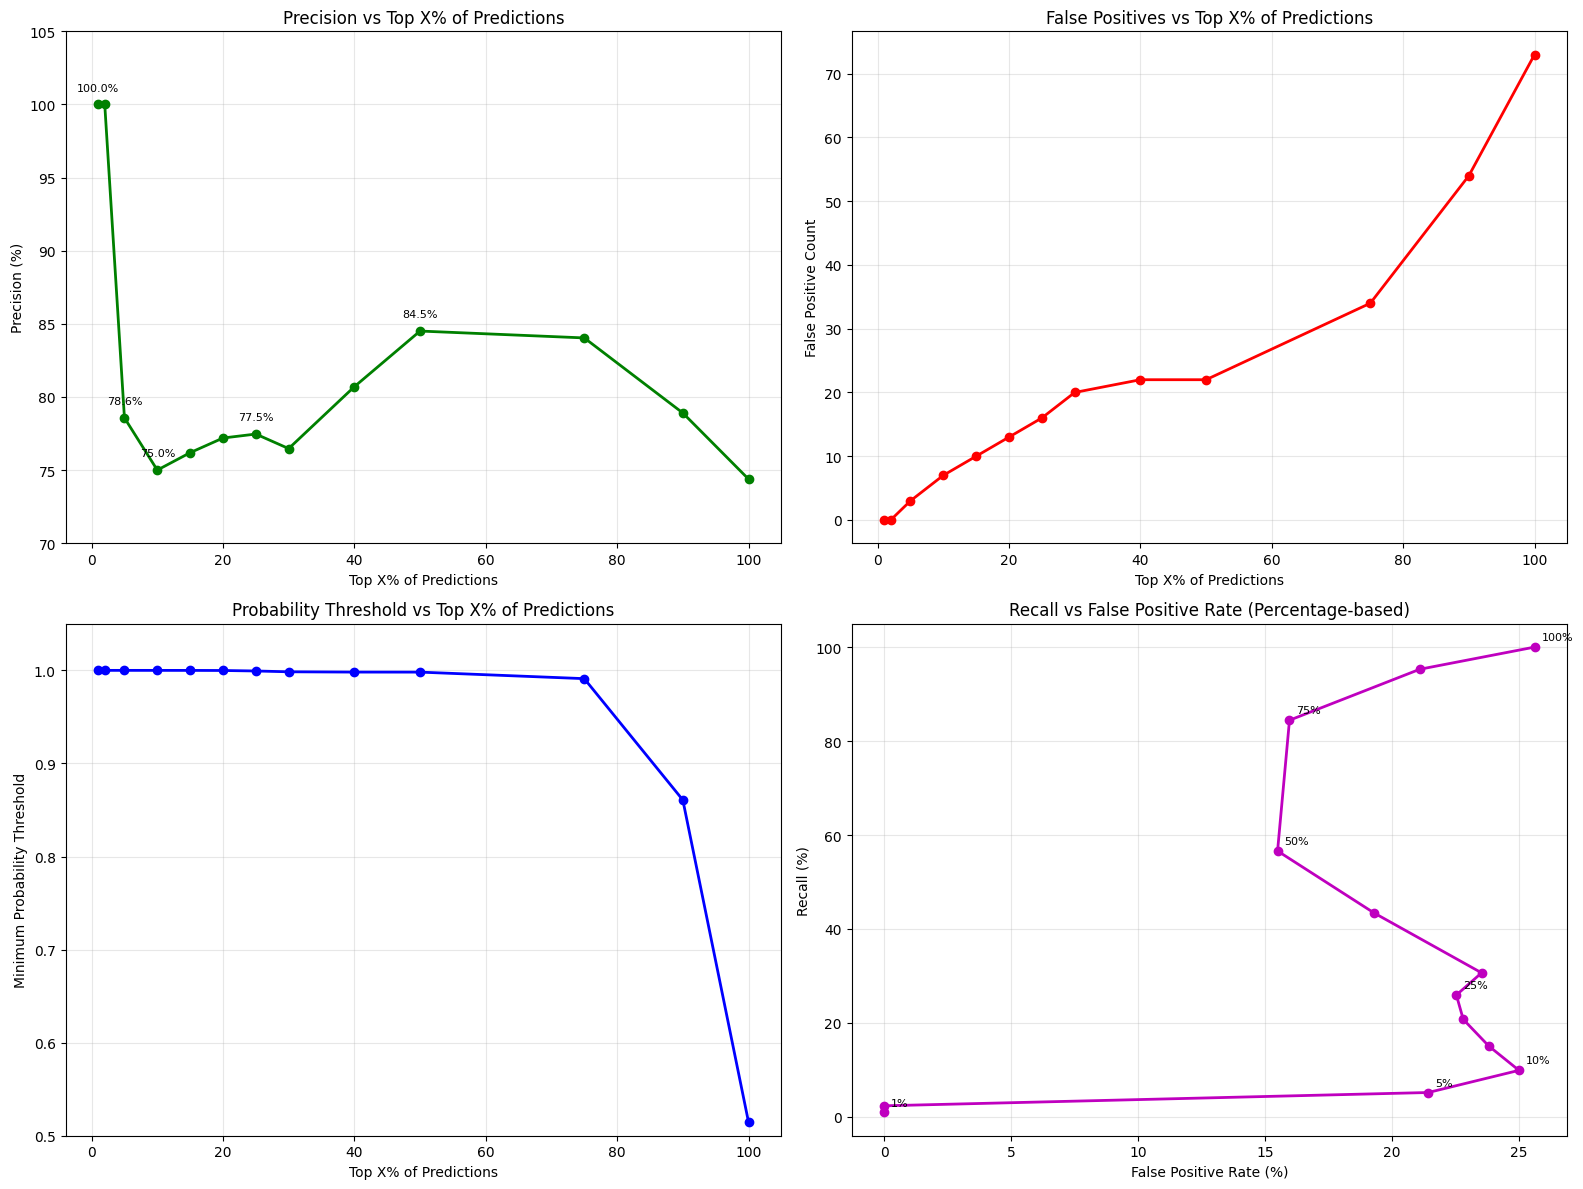

In [31]:
# VISUALIZATION OF PERCENTAGE-BASED ANALYSIS

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Precision vs Percentage
axes[0, 0].plot(pct_stats['percentage'], pct_stats['precision'] * 100, 'go-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Top X% of Predictions')
axes[0, 0].set_ylabel('Precision (%)')
axes[0, 0].set_title('Precision vs Top X% of Predictions')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(70, 105)

# Add annotations for key points
for i, row in pct_stats.iterrows():
    if row['percentage'] in [1, 5, 10, 25, 50]:
        axes[0, 0].annotate(f"{row['precision']:.1%}", 
                           (row['percentage'], row['precision'] * 100),
                           textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# 2. False Positive Count vs Percentage  
axes[0, 1].plot(pct_stats['percentage'], pct_stats['false_positives'], 'ro-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Top X% of Predictions')
axes[0, 1].set_ylabel('False Positive Count')
axes[0, 1].set_title('False Positives vs Top X% of Predictions')
axes[0, 1].grid(True, alpha=0.3)

# 3. Probability Threshold vs Percentage
axes[1, 0].plot(pct_stats['percentage'], pct_stats['min_prob_threshold'], 'bo-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Top X% of Predictions')
axes[1, 0].set_ylabel('Minimum Probability Threshold')
axes[1, 0].set_title('Probability Threshold vs Top X% of Predictions')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0.5, 1.05)

# 4. Recall vs False Positive Rate (percentage-based)
axes[1, 1].plot(pct_stats['fp_rate'] * 100, pct_stats['recall'] * 100, 'mo-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('False Positive Rate (%)')
axes[1, 1].set_ylabel('Recall (%)')
axes[1, 1].set_title('Recall vs False Positive Rate (Percentage-based)')
axes[1, 1].grid(True, alpha=0.3)

# Add percentage labels
for i, row in pct_stats.iterrows():
    if row['percentage'] in [1, 5, 10, 25, 50, 75, 100]:
        axes[1, 1].annotate(f"{row['percentage']:.0f}%", 
                           (row['fp_rate'] * 100, row['recall'] * 100),
                           textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.tight_layout()
plt.show()

In [32]:
# COMPREHENSIVE SUMMARY - PERCENTAGE-BASED vs FIXED NUMBER ANALYSIS

print("🎯 COMPREHENSIVE RANKED K STATISTICS SUMMARY")
print("=" * 80)
print()

print("📈 PERCENTAGE-BASED INSIGHTS (More Meaningful for Your Data):")
print("-" * 60)
print("✅ EXCELLENT PERFORMANCE:")
print(f"• Top 1-2% ({int(pct_stats.iloc[0]['k_predictions'])}-{int(pct_stats.iloc[1]['k_predictions'])} predictions): 100% precision, 0 false positives")
print()

print("✅ VERY GOOD PERFORMANCE:")  
print(f"• Top 5% ({int(pct_stats.iloc[2]['k_predictions'])} predictions): {pct_stats.iloc[2]['precision']:.1%} precision, {int(pct_stats.iloc[2]['false_positives'])} false positives")
print(f"• Top 10% ({int(pct_stats.iloc[3]['k_predictions'])} predictions): {pct_stats.iloc[3]['precision']:.1%} precision, {int(pct_stats.iloc[3]['false_positives'])} false positives")
print()

print("✅ GOOD PERFORMANCE:")
print(f"• Top 25% ({int(pct_stats.iloc[6]['k_predictions'])} predictions): {pct_stats.iloc[6]['precision']:.1%} precision, {int(pct_stats.iloc[6]['false_positives'])} false positives")
print(f"• Top 50% ({int(pct_stats.iloc[9]['k_predictions'])} predictions): {pct_stats.iloc[9]['precision']:.1%} precision, {int(pct_stats.iloc[9]['false_positives'])} false positives")
print()

print("⚠️  DECLINING PERFORMANCE:")
print(f"• Top 75% ({int(pct_stats.iloc[10]['k_predictions'])} predictions): {pct_stats.iloc[10]['precision']:.1%} precision, {int(pct_stats.iloc[10]['false_positives'])} false positives")
print(f"• Top 90% ({int(pct_stats.iloc[11]['k_predictions'])} predictions): {pct_stats.iloc[11]['precision']:.1%} precision, {int(pct_stats.iloc[11]['false_positives'])} false positives")
print()

print("🔍 KEY DATA CHARACTERISTICS:")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.99])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.99])/total_positive_predictions*100:.1f}%) have probability ≥ 0.99")
print(f"• This means most of your high-confidence predictions cluster near perfect probability")
print(f"• Fixed numbers like 'top 10' are less meaningful when top {len(positive_preds[positive_preds['prob_1'] >= 0.99])} all have prob ≥ 0.99")
print()

print("💡 ACTIONABLE RECOMMENDATIONS:")
print("🎯 For MAXIMUM PRECISION (≥99%): Use top 1-2% of predictions")
print("🎯 For HIGH PRECISION (75-85%): Use top 5-50% of predictions") 
print("🎯 For BALANCED APPROACH: Use top 25% (77.5% precision, 25.9% recall)")
print("🎯 For HIGH RECALL (95%+): Use top 90% but expect ~21% false positive rate")
print()

print("🚨 CRITICAL INSIGHT:")
print("Your model has a very skewed probability distribution - most predictions are either")
print("very confident (prob ≥ 0.99) or lower confidence. This suggests the model is")
print("well-calibrated but you should focus on percentage-based thresholds rather than")
print("fixed numbers for more meaningful analysis.")

🎯 COMPREHENSIVE RANKED K STATISTICS SUMMARY

📈 PERCENTAGE-BASED INSIGHTS (More Meaningful for Your Data):
------------------------------------------------------------
✅ EXCELLENT PERFORMANCE:
• Top 1-2% (2-5 predictions): 100% precision, 0 false positives

✅ VERY GOOD PERFORMANCE:
• Top 5% (14 predictions): 78.6% precision, 3 false positives
• Top 10% (28 predictions): 75.0% precision, 7 false positives

✅ GOOD PERFORMANCE:
• Top 25% (71 predictions): 77.5% precision, 16 false positives
• Top 50% (142 predictions): 84.5% precision, 22 false positives

⚠️  DECLINING PERFORMANCE:
• Top 75% (213 predictions): 84.0% precision, 34 false positives
• Top 90% (256 predictions): 78.9% precision, 54 false positives

🔍 KEY DATA CHARACTERISTICS:
• 219 predictions (76.8%) have probability ≥ 0.99
• This means most of your high-confidence predictions cluster near perfect probability
• Fixed numbers like 'top 10' are less meaningful when top 219 all have prob ≥ 0.99

💡 ACTIONABLE RECOMMENDATIONS:
🎯 Fo